In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [45]:
# Load the dataset
df = pd.read_csv('cereal.csv')

In [46]:
# Display the first row of the dataframe to verify successful loading
df.head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


In [47]:
# Step 1: Basic Data Exploration

# Get a summary of the dataset including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [48]:
# Get descriptive statistics for numeric columns
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [49]:
# Check for missing values in the dataset
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [50]:

# Mapping dictionary
mfr_mapping = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

# Replace the values in the 'mfr' column to the actual name of the brands
df['mfr'] = df['mfr'].replace(mfr_mapping)

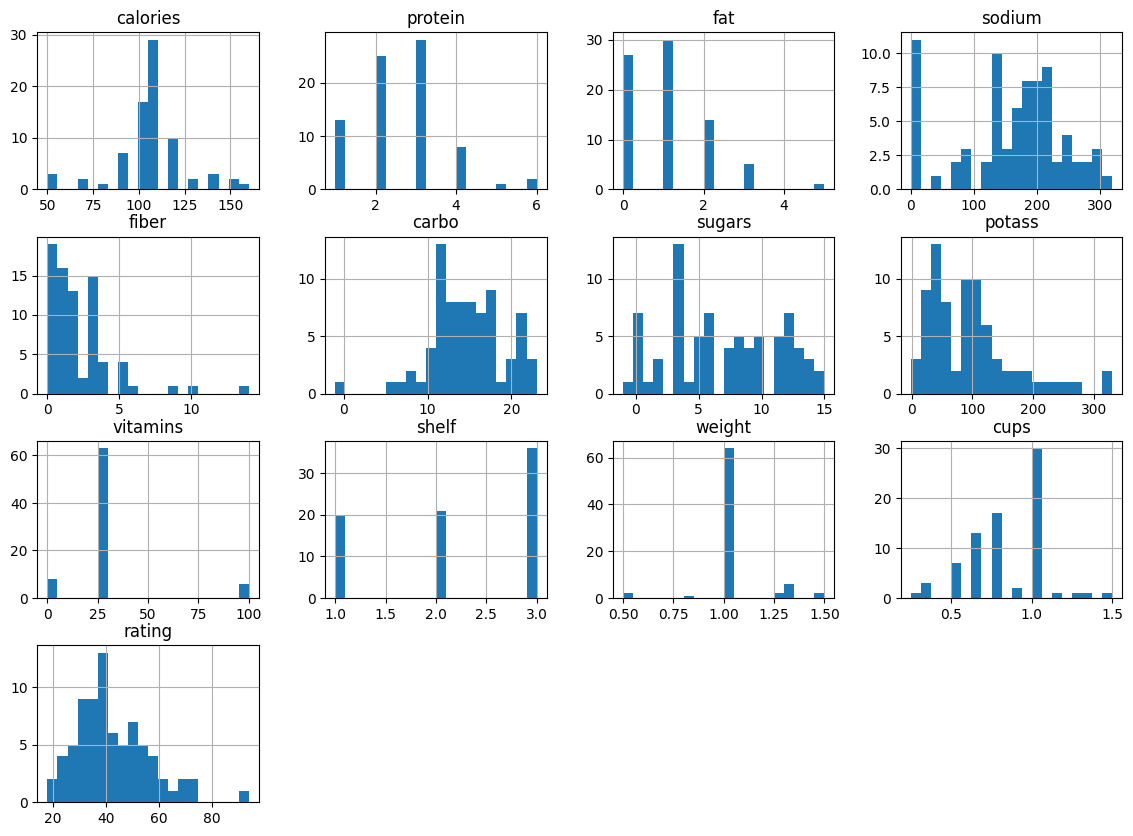

In [51]:
# Step 3: Data Visualization and Analysis

# Plot histograms to see the distribution of numeric features
df.hist(bins=20, figsize=(14, 10))
plt.show()

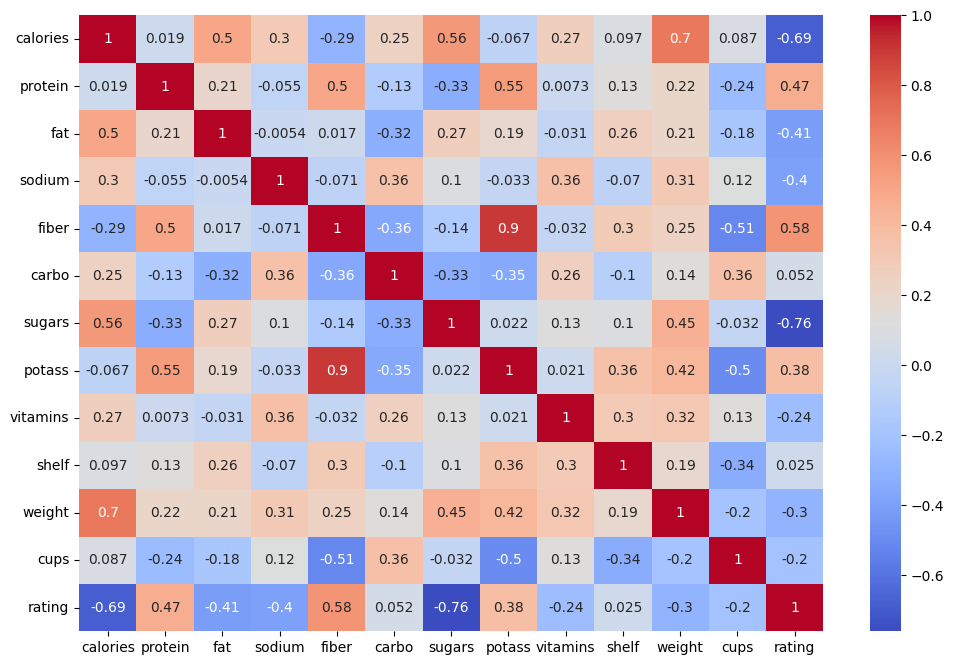

In [52]:
# Drop non-numeric columns before computing the correlation matrix
numeric_df = df.drop(columns=['name', 'mfr', 'type'])

# Create a correlation matrix to see the relationships between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

mfr
Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64


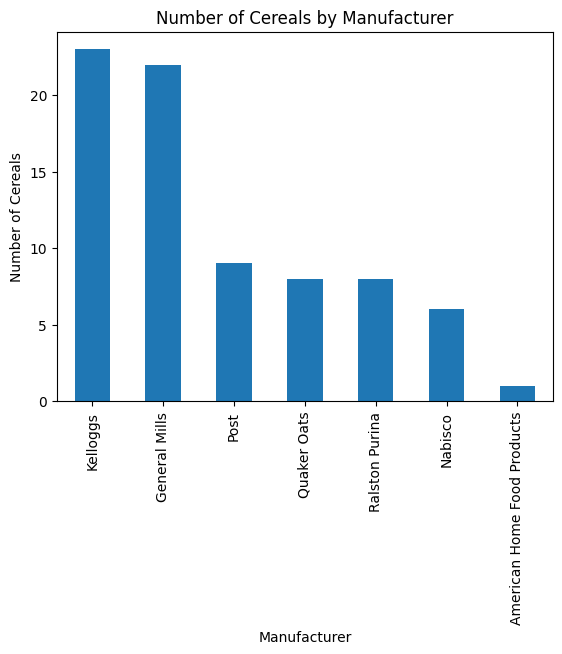

In [53]:
# Count the number of cereals by manufacturer and plot the counts
manufacturer_counts = df['mfr'].value_counts()
print(manufacturer_counts)

manufacturer_counts.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cereals')
plt.title('Number of Cereals by Manufacturer')
plt.show()

                               calories   protein       fat      sodium  \
mfr                                                                       
American Home Food Products  100.000000  4.000000  1.000000    0.000000   
General Mills                111.363636  2.318182  1.363636  200.454545   
Kelloggs                     108.695652  2.652174  0.608696  174.782609   
Nabisco                       86.666667  2.833333  0.166667   37.500000   
Post                         108.888889  2.444444  0.888889  146.111111   
Quaker Oats                   95.000000  2.625000  1.750000   92.500000   
Ralston Purina               115.000000  2.500000  1.250000  198.125000   

                                fiber      carbo    sugars      potass  
mfr                                                                     
American Home Food Products  0.000000  16.000000  3.000000   95.000000  
General Mills                1.272727  14.727273  7.954545   85.227273  
Kelloggs                     2.7

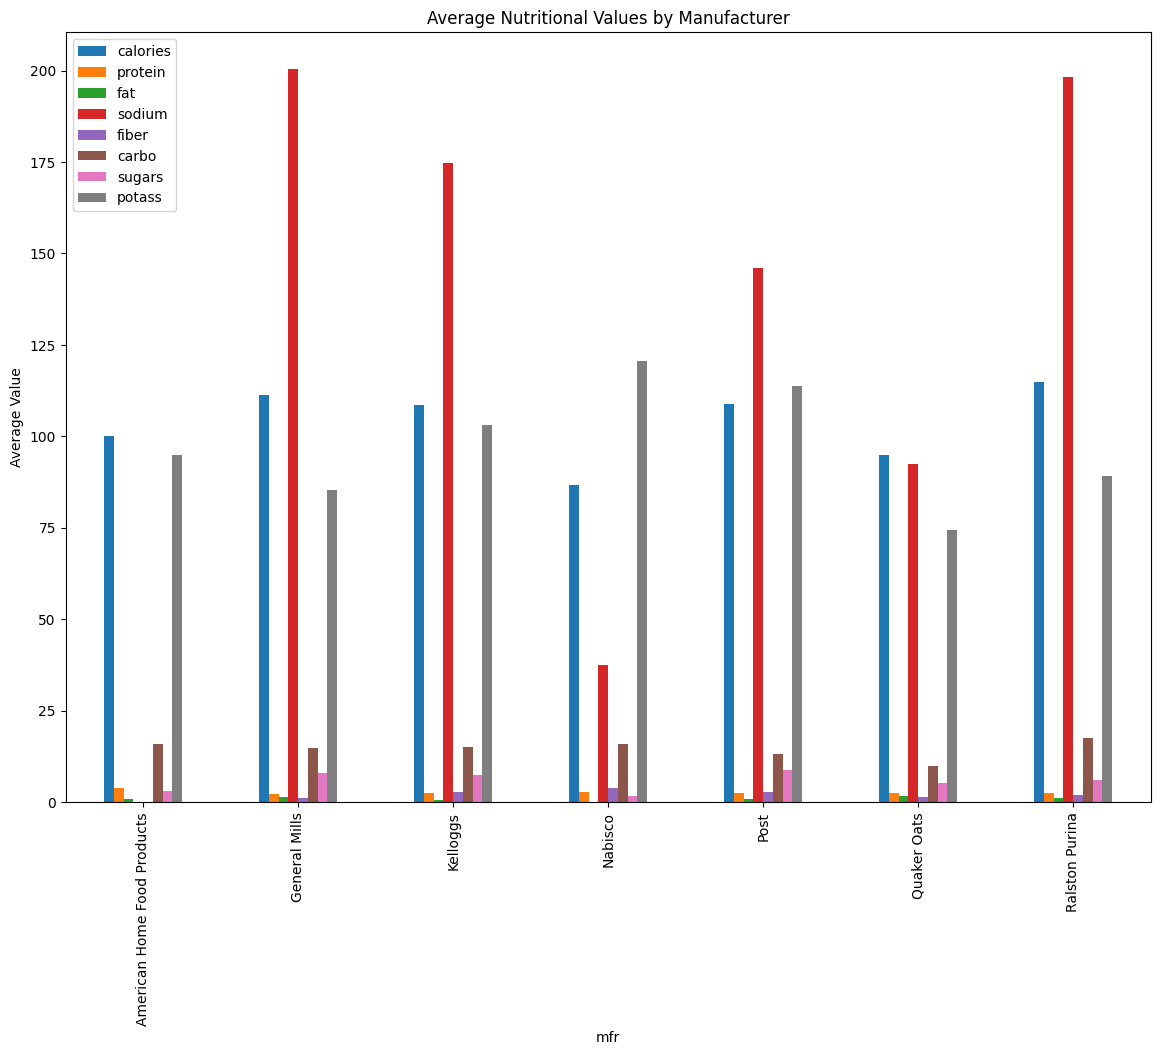

In [54]:
# Step 4: Advanced Analysis

# Compare the nutritional values across different manufacturers and plot the means
nutritional_means = df.groupby('mfr')[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']].mean()
print(nutritional_means)

nutritional_means.plot(kind='bar', figsize=(14, 10))
plt.title('Average Nutritional Values by Manufacturer')
plt.ylabel('Average Value')
plt.show()

                         name     rating
3   All-Bran with Extra Fiber  93.704912
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787
0                   100% Bran  68.402973
63             Shredded Wheat  68.235885
20     Cream of Wheat (Quick)  64.533816
55               Puffed Wheat  63.005645
54                Puffed Rice  60.756112
50          Nutri-grain Wheat  59.642837
2                    All-Bran  59.425505


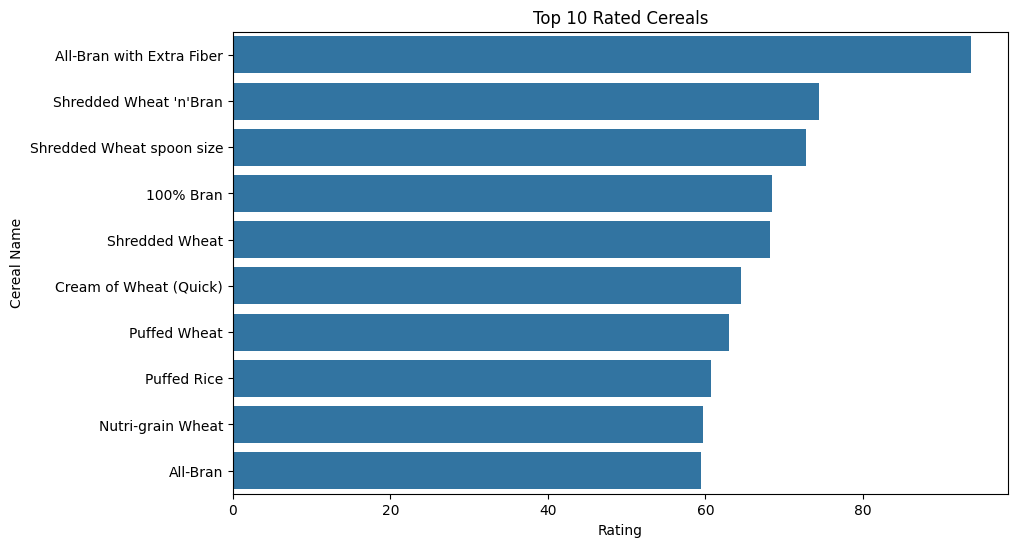

In [55]:
# Find and visualize the top-rated cereals
top_rated = df.sort_values(by='rating', ascending=False).head(10)
print(top_rated[['name', 'rating']])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated, x='rating', y='name')
plt.title('Top 10 Rated Cereals')
plt.xlabel('Rating')
plt.ylabel('Cereal Name')
plt.show()

In [56]:
# Step 5: Additional Tips

# Normalize or standardize numeric data if necessary
scaler = StandardScaler()
df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']] = scaler.fit_transform(df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']])


In [57]:
# Summarize findings and perform additional analyses as needed
# Example: Create a healthiness score based on nutritional content (optional)
df['healthiness_score'] = df['fiber'] * 2 - df['sugars'] - df['fat']
print(df[['name', 'healthiness_score']].sort_values(by='healthiness_score', ascending=False).head(10))

                         name  healthiness_score
3   All-Bran with Extra Fiber          12.588087
0                   100% Bran           6.850674
2                    All-Bran           6.232474
64     Shredded Wheat 'n'Bran           4.141560
9                 Bran Flakes           3.853948
65  Shredded Wheat spoon size           3.296907
63             Shredded Wheat           3.296907
50          Nutri-grain Wheat           2.844001
33                 Grape-Nuts           2.617548
28              Fruitful Bran           2.268777
